## Wholesale Customer (Cluster)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wholesale customers dataset
cust_data = pd.read_csv(r"Datasets/Wholesale/Wholesale_customers_data.csv")

#Rows and Columns
print(cust_data.shape)
print(cust_data.columns.values)
#Dataset Information
cust_data.info()

(440, 9)
['Cust_id' 'Channel' 'Region' 'Fresh' 'Milk' 'Grocery' 'Frozen'
 'Detergents_Paper' 'Delicatessen']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Cust_id             440 non-null int64
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(9)
memory usage: 31.1 KB


In [3]:
#Head
pd.set_option('display.max_columns', None) #This option displays all the columns 
cust_data.sample(n=5, random_state=77)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
45,46,2,3,5181,22044,21531,1740,7353,4985
223,224,2,1,2790,2527,5265,5612,788,1360
64,65,1,3,4760,1227,3250,3724,1247,1145
366,367,1,3,9561,2217,1664,1173,222,447
288,289,1,3,16260,594,1296,848,445,258


In [6]:
#Frequency Counts
cust_data["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
cust_data["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [8]:
#Summary
round(cust_data.describe(),2)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


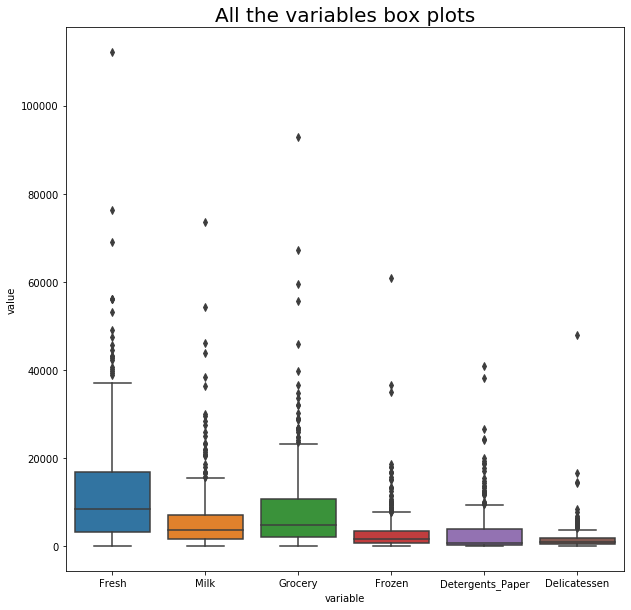

In [10]:
# Box Plots
plt.figure(figsize=(10,10))
plt.title("All the variables box plots", size=20)
sns.boxplot(x="variable", y="value", data=pd.melt(cust_data[['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']]))
plt.show()

In [11]:
#Distance Measure
cust_data_sample=cust_data.sample(n=5, random_state=77)
cust_data_sample[["Cust_id","Fresh", "Grocery"]]

,Cust_id,Fresh,Grocery
45,46,5181,21531
223,224,2790,5265
64,65,4760,3250
366,367,9561,1664
288,289,16260,1296


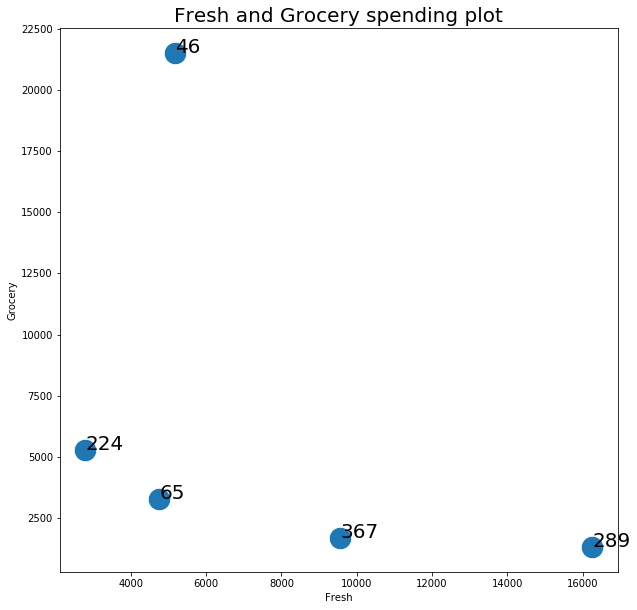

In [12]:
#Scatter plot of customers
plt.figure(figsize=(10,10))
plt.title("Fresh and Grocery spending plot", size=20)
plot=sns.scatterplot(x="Fresh",y="Grocery", data=cust_data_sample, s=500)
for i in list(cust_data_sample.index):
    plot.text(cust_data_sample.Fresh[i],cust_data_sample.Grocery[i],cust_data_sample.Cust_id[i],size=20)

In [13]:
#############
## Distance Matrix

def distance_cal(data_frame):
    distance_matrix=np.zeros((data_frame.shape[0],data_frame.shape[0]))
    for i in range(0 , data_frame.shape[0]):
        for j in range(0 , data_frame.shape[0]):
            distance_matrix[i,j]=round(np.sqrt(sum((data_frame.iloc[i] - data_frame.iloc[j])**2)))
    return(distance_matrix)

distance_matrix=distance_cal(cust_data_sample[["Fresh", "Grocery"]])
print(distance_matrix)
print(distance_matrix[0,0])
print(distance_matrix[1,0])
print(distance_matrix[2,1])

[[    0. 16441. 18286. 20344. 23069.]
 [16441.     0.  2818.  7669. 14043.]
 [18286.  2818.     0.  5056. 11665.]
 [20344.  7669.  5056.     0.  6709.]
 [23069. 14043. 11665.  6709.     0.]]
0.0
16441.0
2818.0


In [14]:
############################
## Building clusters in Python    
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=333) # Mention the Number of clusters
X=cust_data.drop(['Cust_id', 'Channel', 'Region'],axis=1) # Custid is not needed
kmeans = kmeans.fit(X) #Model building

# Getting the cluster labels and attaching them to the original data
cust_data_clusters=cust_data
cust_data_clusters["Cluster_id"]= kmeans.predict(X)
cust_data_clusters.head(10)

,Cust_id,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cluster_id
0,1,2,3,12669,9656,7561,214,2674,1338,0
1,2,2,3,7057,9810,9568,1762,3293,1776,0
2,3,2,3,6353,8808,7684,2405,3516,7844,0
3,4,1,3,13265,1196,4221,6404,507,1788,4
4,5,2,3,22615,5410,7198,3915,1777,5185,4
5,6,2,3,9413,8259,5126,666,1795,1451,0
6,7,2,3,12126,3199,6975,480,3140,545,0
7,8,2,3,7579,4956,9426,1669,3321,2566,0
8,9,1,3,5963,3648,6192,425,1716,750,0
9,10,2,3,6006,11093,18881,1159,7425,2098,2


In [16]:
#Final Results
cluster_counts=cust_data_clusters['Cluster_id'].value_counts(sort=False)
cluster_means= cust_data_clusters.groupby(['Cluster_id']).mean()

print(cluster_counts)
print()
print(round(cluster_means,1))

0    217
1     27
2     82
3      7
4    107
Name: Cluster_id, dtype: int64

            Cust_id  Channel  Region    Fresh     Milk  Grocery  Frozen  \
Cluster_id                                                                
0             230.0      1.2     2.5   5834.0   3322.4   4096.3  2635.2   
1             225.1      1.1     2.7  46916.6   7033.6   6205.3  9757.0   
2             207.1      1.9     2.5   5057.0  12105.1  18414.1  1580.7   
3             127.9      2.0     2.6  20031.3  38084.0  56126.1  2564.6   
4             216.4      1.2     2.5  20490.7   3554.1   5040.1  3446.8   

            Detergents_Paper  Delicatessen  
Cluster_id                                  
0                     1234.7         995.5  
1                      936.4        4199.3  
2                     8092.0        1828.7  
3                    27644.6        2548.1  
4                     1099.0        1623.9  


Text(0.5, 1.0, 'Cluster wise Spendings')

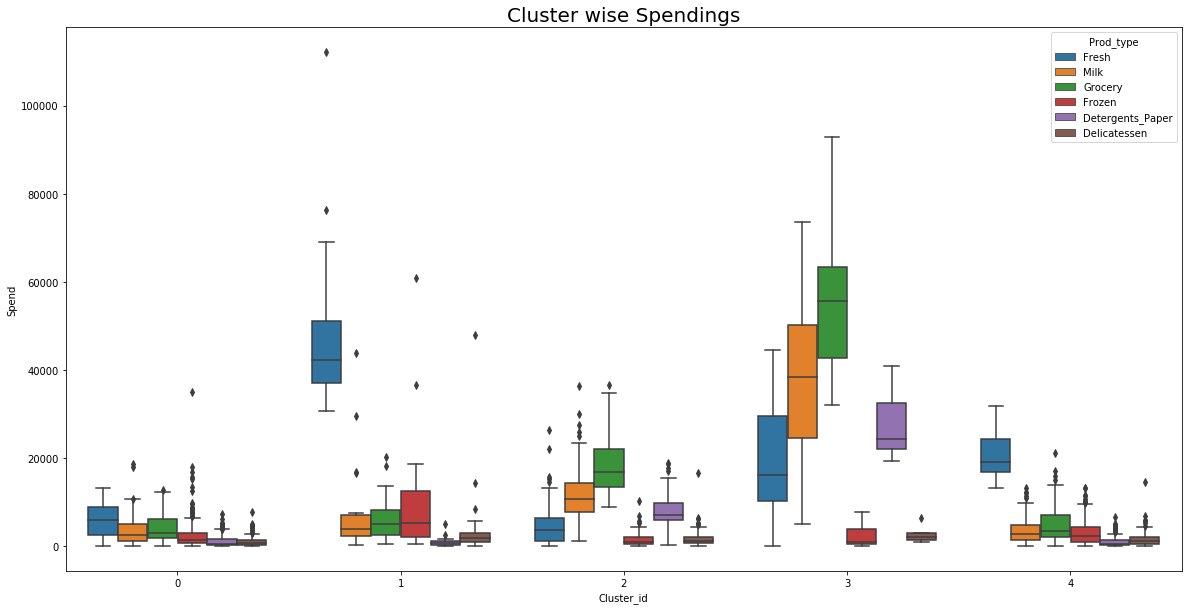

In [17]:
##Cluster wise Spendings box plot
df_melt = pd.melt(cust_data_clusters.drop(['Cust_id', 'Channel', 'Region'],axis=1), "Cluster_id", var_name="Prod_type", value_name="Spend")

plt.figure(figsize=(20,10))
sns.boxplot(x='Cluster_id', hue="Prod_type", y="Spend", data=df_melt)
plt.title("Cluster wise Spendings", size=20)

Text(0.5, 1.0, 'Cluster4')

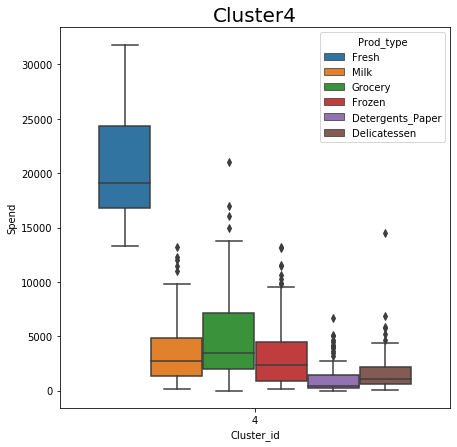

In [18]:
##Cluster 0 to 4
Cluster=df_melt[(df_melt['Cluster_id']==4)] #Change this from 0  to 4 
plt.figure(figsize=(7,7))
sns.boxplot(x='Cluster_id', hue="Prod_type", y="Spend", data=Cluster)
plt.title("Cluster4", size=20)

[10, 11, 17, 24, 29, 38, 39, 43, 44, 46, 47, 48, 50, 54, 57, 58, 62, 64, 66, 78, 82, 83, 86, 87, 93, 95, 101, 102, 107, 108, 110, 112, 146, 156, 157, 160, 164, 166, 171, 172, 174, 176, 183, 189, 190, 194, 201, 202, 206, 210, 212, 215, 216, 217, 219, 246, 252, 265, 266, 267, 269, 294, 302, 304, 305, 306, 307, 310, 313, 316, 320, 332, 334, 344, 347, 350, 352, 354, 358, 377, 385, 397, 408, 417, 419, 421, 427, 431, 438]


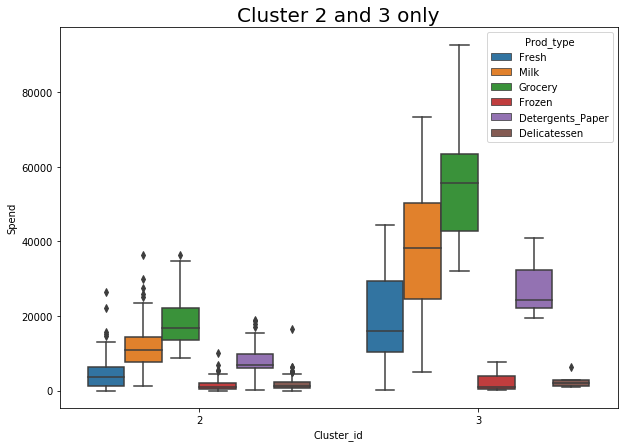

In [19]:
##Objective 1
Cluster_2and3=df_melt[(df_melt['Cluster_id']==2)| (df_melt['Cluster_id']==3)]
plt.figure(figsize=(10,7))
sns.boxplot(x='Cluster_id', hue="Prod_type", y="Spend", data=Cluster_2and3)
plt.title("Cluster 2 and 3 only", size=20)

In [21]:
obj1_data= cust_data_clusters[(cust_data_clusters['Cluster_id']==2)| (cust_data_clusters['Cluster_id']==3)]
print(list(obj1_data["Cust_id"]))

[10, 11, 17, 24, 29, 38, 39, 43, 44, 46, 47, 48, 50, 54, 57, 58, 62, 64, 66, 78, 82, 83, 86, 87, 93, 95, 101, 102, 107, 108, 110, 112, 146, 156, 157, 160, 164, 166, 171, 172, 174, 176, 183, 189, 190, 194, 201, 202, 206, 210, 212, 215, 216, 217, 219, 246, 252, 265, 266, 267, 269, 294, 302, 304, 305, 306, 307, 310, 313, 316, 320, 332, 334, 344, 347, 350, 352, 354, 358, 377, 385, 397, 408, 417, 419, 421, 427, 431, 438]


In [20]:
##Objective 2
obj2_data= cust_data_clusters[cust_data_clusters['Cluster_id']==4]
print(list(obj2_data["Cust_id"]))

[4, 5, 13, 14, 15, 19, 21, 23, 25, 26, 28, 31, 33, 34, 37, 41, 42, 55, 59, 68, 71, 72, 74, 76, 84, 90, 105, 106, 113, 114, 115, 119, 121, 127, 128, 133, 139, 141, 142, 145, 150, 151, 153, 158, 163, 191, 192, 196, 203, 211, 218, 221, 227, 233, 235, 238, 241, 242, 243, 248, 249, 254, 256, 263, 268, 270, 277, 280, 284, 288, 289, 295, 297, 301, 308, 312, 323, 324, 325, 329, 333, 335, 336, 337, 348, 355, 357, 361, 369, 372, 374, 381, 382, 388, 394, 402, 403, 404, 405, 407, 422, 423, 424, 425, 433, 435, 436]


In [22]:
##Objective 3
obj3_data= cust_data_clusters[cust_data_clusters['Cluster_id']==1]
print(list(obj3_data["Cust_id"]))

[30, 40, 53, 88, 104, 125, 126, 130, 143, 177, 182, 184, 197, 240, 259, 260, 274, 283, 285, 286, 290, 326, 371, 378, 383, 428, 437]


In [23]:
##Inertia
print(kmeans.inertia_)

53138778131.15751


In [24]:
###########################
####Elbow Method
elbow_data=pd.DataFrame()
for i in range(1,16):
    kmeans_m2 = KMeans(n_clusters=i, random_state=333) # Mention the Number of clusters
    X=cust_data.drop(['Cust_id', 'Channel', 'Region'],axis=1) # Custid is not needed
    model= kmeans_m2.fit(X)
    elbow_data.at[i,"K"]=i
    elbow_data.at[i,"Inertia"]=round(model.inertia_)/10000000 #To lower the values
print(elbow_data)

       K       Inertia
1    1.0  15759.585837
2    2.0  11321.752961
3    3.0   8034.216798
4    4.0   6485.574107
5    5.0   5313.877813
6    6.0   4727.387665
7    7.0   4131.258478
8    8.0   3627.142213
9    9.0   3281.378566
10  10.0   3006.729241
11  11.0   2837.224803
12  12.0   2659.655791
13  13.0   2455.059454
14  14.0   2258.887159
15  15.0   2118.656948


Text(0, 0.5, 'Inertia')

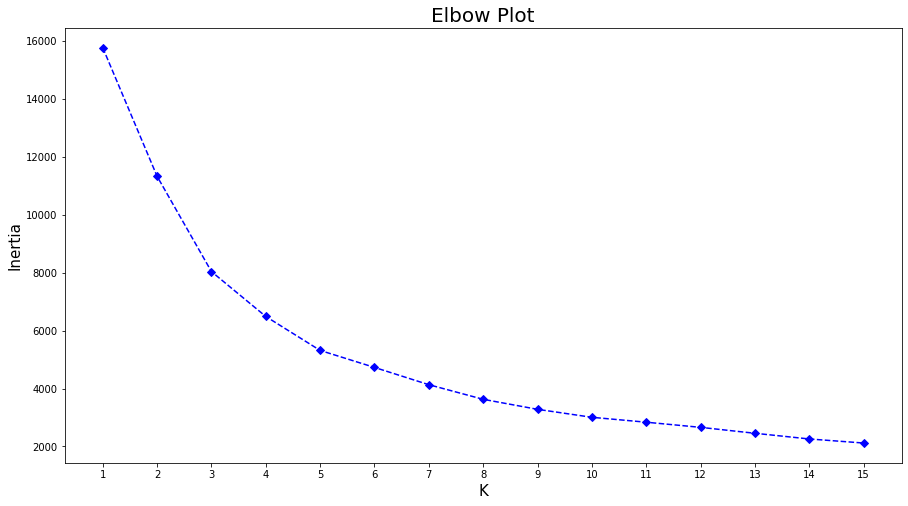

In [25]:
##Elbow Plot
plt.figure(figsize=(15,8))
plt.title("Elbow Plot", size=20)
plt.plot(elbow_data["K"],elbow_data["Inertia"],'--bD')
plt.xticks(elbow_data["K"])
plt.xlabel("K", size=15)
plt.ylabel("Inertia", size=15)